# Lang Graph

## Tools

### Wikipedia API Wrapper Tool (Summary from wikipedia)

In [5]:
from langchain_community.tools import WikipediaQueryRun

In [6]:
from langchain_community.utilities import WikipediaAPIWrapper

In [7]:
api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max= 500)

In [8]:
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [9]:
wiki_tool.name

'wikipedia'

In [10]:
wiki_tool.description

'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.'

In [11]:
wiki_tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [12]:
wiki_tool.run({"query":"elon musk"})

"Page: Elon Musk\nSummary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is a businessman. He is known for his leadership of Tesla, SpaceX, X (formerly Twitter), and the Department of Government Efficiency (DOGE). Musk has been considered the wealthiest person in the world since 2021; as of May 2025, Forbes estimates his net worth to be US$424.7 billion. \nBorn to a wealthy family in Pretoria, South Africa, Musk emigrated in 1989 to Canada. He received bachelor's degrees from the University of Penn"

In [13]:
wiki_tool.run("RCB")

c:\Users\saina\.conda\envs\agentic_base\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\saina\.conda\envs\agentic_base\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


"Page: Royal Challengers Bengaluru\nSummary: The Royal Challengers Bengaluru, formerly Royal Challengers Bangalore, also known as RCB, are a professional Twenty20 cricket team based in Bengaluru, Karnataka, that competes in the Indian Premier League (IPL). Founded in 2008 by United Spirits, the team's home ground is M. Chinnaswamy Stadium. They won their first title in 2025. The team finished as the runners-up on three occasions: in 2009, 2011, and 2016. They have also qualified for the playoffs i"

### Youtube Search Tool

In [14]:
from langchain_community.tools import YouTubeSearchTool

In [15]:
tool=YouTubeSearchTool()

In [16]:
tool.name

'youtube_search'

In [17]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [18]:
tool.run("Agentic AI")

"['https://www.youtube.com/watch?v=Jj1-zb38Yfw&pp=ygUKQWdlbnRpYyBBSQ%3D%3D', 'https://www.youtube.com/watch?v=dIb-DujRNEo&pp=ygUKQWdlbnRpYyBBSQ%3D%3D']"

### Tavily Search Tool

In [19]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [20]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [21]:
import os
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [22]:
tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

C:\Users\saina\AppData\Local\Temp\ipykernel_1796\1068719361.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [23]:
tool.invoke({"query":"what happend in RCB victory celebration?"})

[{'title': "Bengaluru stampede case: What we know so far on RCB's ...",
  'url': 'https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/bengaluru-stampede-case-what-we-know-so-far-on-rcbs-celebrations-that-turned-catastrophic/articleshow/121670873.cms',
  'content': "[Follow us](https://news.google.com/publications/CAAqBwgKMM6y_Qowwu70Ag)\n\nRoyal Challengers Bengaluru's IPL victory celebrations turned tragic as a stampede at M Chinnaswamy Stadium resulted in 11 deaths and 75 injuries. FIRs have been filed against RCB, events organisers DNA, and Karnataka State Cricket Association for alleged negligence. The Karnataka High Court has sought a report from the government while arrests have been and officials suspended.\n\nRead More [...] [](https://timesofindia.indiatimes.com/city/bengaluru/celebrations-turn-tragic-bloodbath-at-rcbs-maiden-ipl-trophy-victory-day-to-remember-forever-see-pics/photostory/121646177.cms)[Celebrations turn tragic: Bloodbath at RCB’s maiden IPL trop

### Custom tool

In [24]:
def multiply(a:int,b:int)->int:
    return a*b

In [25]:
multiply(10,20)

200

In [26]:
# multiply.run(10,20)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[52], line 1
----> 1 multiply.run(10,20)

AttributeError: 'function' object has no attribute 'run'

In [27]:
# multiply.invoke(10,20)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[53], line 1
----> 1 multiply.invoke(10,20)

AttributeError: 'function' object has no attribute 'invoke'

In [28]:
from langchain.agents import tool
@tool
def multiply(a:int,b:int)->int:
    '''this tool is for the multiplication'''
    return a*b

In [29]:
multiply.invoke({"a":10,"b":20})

200

In [30]:
multiply.name

'multiply'

In [31]:
multiply.description

'this tool is for the multiplication'

In [32]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [33]:
def get_word_length(word:str)->int:
    return len(word)

In [34]:
get_word_length("Sainadh bahadursha")

18

In [35]:
get_word_length("narendra modi")

13

In [36]:
@tool
def get_word_length(word:str)->int:
    """this function is calculating a length of the word"""
    return len(word)

In [37]:
get_word_length.name

'get_word_length'

In [38]:
get_word_length.description

'this function is calculating a length of the word'

In [39]:
get_word_length.args

{'word': {'title': 'Word', 'type': 'string'}}

In [40]:
get_word_length("sainadh")

C:\Users\saina\AppData\Local\Temp\ipykernel_1796\1704822211.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  get_word_length("sainadh")


7

In [41]:
get_word_length.invoke("sainadh")

7

### Gmail tool

In [42]:
# @tool
# def call_gmail_api(args):
#     """this is my gmail api calling funtion"""
#     pass

In [43]:
# from langchain.agents import tool
# import os
# import base64
# from email import message_from_bytes
# from google.auth.transport.requests import Request
# from google.oauth2.credentials import Credentials
# from google_auth_oauthlib.flow import InstalledAppFlow
# from googleapiclient.discovery import build

# SCOPES = ['https://www.googleapis.com/auth/gmail.readonly']
# from langchain.tools import tool
# from pydantic import BaseModel, Field

# class GmailArgs(BaseModel):
#     max_results: int = Field(..., description="Number of unread emails to fetch")

# @tool
# def call_gmail_api(args: GmailArgs) -> str:
#     """
#     Reads unread emails from Gmail inbox using Gmail API.
#     Args:
#         max_results (int): Maximum number of unread emails to fetch. Default is 5.
#     Returns:
#         A string summary of unread emails.
#     """
#     max_results = args.max_results

#     try:
#         creds = None
#         if os.path.exists('token.json'):
#             creds = Credentials.from_authorized_user_file('token.json', SCOPES)
#         if not creds or not creds.valid:
#             if creds and creds.expired and creds.refresh_token:
#                 creds.refresh(Request())
#             else:
#                 flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
#                 creds = flow.run_local_server(port=0)
#             with open('token.json', 'w') as token:
#                 token.write(creds.to_json())

#         service = build('gmail', 'v1', credentials=creds)
#         results = service.users().messages().list(userId='me', labelIds=['INBOX', 'UNREAD'], maxResults=max_results).execute()
#         messages = results.get('messages', [])

#         if not messages:
#             return "No unread emails found."

#         summaries = []
#         for msg in messages:
#             msg_data = service.users().messages().get(userId='me', id=msg['id']).execute()
#             headers = msg_data['payload']['headers']
#             subject = next((h['value'] for h in headers if h['name'] == 'Subject'), '(No Subject)')
#             sender = next((h['value'] for h in headers if h['name'] == 'From'), '(Unknown Sender)')
#             snippet = msg_data.get('snippet', '')
#             summaries.append(f"From: {sender}\nSubject: {subject}\nSnippet: {snippet}")

#         return "\n\n".join(summaries)

#     except Exception as e:
#         return f"Error accessing Gmail API: {e}"

# # @tool
# # def call_gmail_api(max_results: int = 5) -> str:
# #     """
# #     Reads unread emails from Gmail inbox using Gmail API.
# #     Args:
# #         max_results (int): Maximum number of unread emails to fetch. Default is 5.
# #     Returns:
# #         A string summary of unread emails.
# #     """
# #     try:
# #         creds = None
# #         if os.path.exists('token.json'):
# #             creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# #         if not creds or not creds.valid:
# #             if creds and creds.expired and creds.refresh_token:
# #                 creds.refresh(Request())
# #             else:
# #                 flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
# #                 creds = flow.run_local_server(port=0)
# #             with open('token.json', 'w') as token:
# #                 token.write(creds.to_json())

# #         service = build('gmail', 'v1', credentials=creds)
# #         results = service.users().messages().list(userId='me', labelIds=['INBOX', 'UNREAD'], maxResults=max_results).execute()
# #         messages = results.get('messages', [])

# #         if not messages:
# #             return "No unread emails found."

# #         summaries = []
# #         for msg in messages:
# #             msg_data = service.users().messages().get(userId='me', id=msg['id']).execute()
# #             headers = msg_data['payload']['headers']
# #             subject = next((h['value'] for h in headers if h['name'] == 'Subject'), '(No Subject)')
# #             sender = next((h['value'] for h in headers if h['name'] == 'From'), '(Unknown Sender)')
# #             snippet = msg_data.get('snippet', '')
# #             summaries.append(f"From: {sender}\nSubject: {subject}\nSnippet: {snippet}")

# #         return "\n\n".join(summaries)

# #     except Exception as e:
# #         return f"Error accessing Gmail API: {e}"



In [44]:
# # from langchain.agents import initialize_agent
# # from langchain.agents.agent_types import AgentType
# # from langchain.chat_models import ChatOpenAI

# # # Register the tool
# # tools = [call_gmail_api]

# # llm = ChatOpenAI(model="gpt-3.5-turbo")

# # agent = initialize_agent(
# #     tools=tools,
# #     llm=llm,
# #     agent_type=AgentType.OPENAI_FUNCTIONS,
# #     verbose=True,
# # )

# # # Example query
# # response = agent.run("Read my last 3 unread emails.")
# # print(response)

# from langchain.agents import initialize_agent, AgentType
# from langchain.chat_models import ChatOpenAI

# tools = [call_gmail_api]
# llm = ChatOpenAI(model="gpt-3.5-turbo")

# agent = initialize_agent(
#     tools=tools,
#     llm=llm,
#     agent_type=AgentType.OPENAI_FUNCTIONS,  # Requires structured input
#     verbose=True,
# )

# # Test
# response = agent.run("Get my last 3 unread emails.")
# print(response)


## Langgraph Intro 1

In [1]:
def function1(input1):
    return input1 + " from first function"

In [2]:
def function2(input2):
    return input2 + " Bahadursha from second function"

In [3]:
def function3(input3):
    pass

In [4]:
function1("Sainadh")

'Sainadh from first function'

In [49]:
function2("Bahadursha")

'Bahadursha Bahadursha from second function'

In [50]:
from langgraph.graph import Graph

In [51]:
workflow1 = Graph()

In [52]:
workflow1.add_node("fun1",function1)

In [53]:
workflow1.add_node("fun2",function2)

In [54]:
workflow1.add_edge("fun1","fun2")

In [55]:
workflow1.set_entry_point("fun1")

In [56]:
workflow1.set_finish_point("fun2")

In [57]:
app = workflow1.compile()

In [58]:
from IPython.display import Image, display

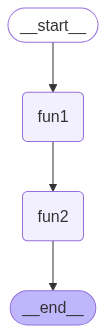

In [59]:
display(Image(app.get_graph().draw_mermaid_png()))

In [60]:
app.invoke("Hi this is Sainadh")

'Hi this is Sainadh from first function Bahadursha from second function'

In [61]:
for output in app.stream("hi this is Sainadh"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("___________")
        print(value)
        print("\n")

here is output from fun1
___________
hi this is Sainadh from first function


here is output from fun2
___________
hi this is Sainadh from first function Bahadursha from second function




In [62]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [63]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [64]:
workflow2 = Graph()

In [65]:
workflow2.add_node("My_LLM",llm)

In [66]:
workflow2.add_node("LLM_Output_Token_Counter",token_counter)

In [67]:
workflow2.add_edge("My_LLM","LLM_Output_Token_Counter")

In [68]:
workflow2.set_entry_point("My_LLM")

In [69]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [70]:
app=workflow2.compile()

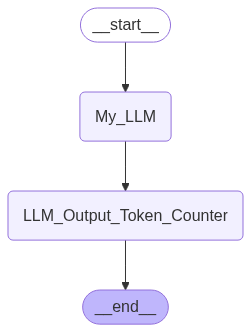

In [71]:
display(Image(app.get_graph().draw_mermaid_png()))

In [75]:
from dotenv import load_dotenv
load_dotenv()

True

In [76]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 68'

In [77]:
app.invoke("tell me about the tata enterpirse in very detail.")

'total token number in the generated answer is 667'

In [78]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai, Maharashtra.  It's not a single entity but a network of over 100 operating companies, spanning diverse sectors and employing millions of people globally.  Understanding its complexity requires looking at several key aspects:

**I. History and Structure:**

* **Origins:** The group traces its roots back to 1868 when Jamsetji Tata founded the Tata & Sons trading company.  His vision extended beyond profit, encompassing social responsibility and nation-building, a philosophy that continues to define the group.
* **Structure:**  The Tata Group isn't a typical corporation.  It's a complex web of independent companies, many publicly listed, held together by a shared philosophy and the overarching influence of Tata Sons, the holding company.  Tata Sons owns substantial stakes in many group companies, but doesn't directl

## Langgraph Intro 2

### Config the model

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


### Config the embedding model

In [2]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

c:\Users\saina\.conda\envs\agentic_base\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

### lets take a data embedd it and store in VDB

In [3]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import FAISS
# from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [4]:
loader=DirectoryLoader("data",glob="./*.txt",loader_cls=TextLoader)

In [5]:
docs=loader.load()

In [6]:
docs

[Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairn

In [7]:
docs[0].page_content

'The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairness because we act without animus, not in enmity toward a people

In [8]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [9]:
new_docs=text_splitter.split_documents(documents=docs)

In [10]:
new_docs

[Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind.'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel

In [11]:
doc_string=[doc.page_content for doc in new_docs]

In [12]:
doc_string

['The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no',
 'We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind.',
 'one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.',
 'Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our',
 'peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be',
 'of right and of fair play we p

In [13]:
len(doc_string)

82

In [14]:
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [15]:
index=faiss.IndexFlatL2(384)

In [16]:
vector_store=FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [17]:
vector_store.add_documents(documents=new_docs)

['feee9286-d62a-44e3-948b-f9a2fd2f3799',
 'f6d85f2d-f418-403c-962a-f6525db9958d',
 '1f891550-e7e5-4090-8118-841d0ada75f5',
 '0c3ae827-84e7-414c-92e0-bfb5b000a760',
 '963a96e9-29a3-4bd0-aeeb-61850e905823',
 '5b359f6e-1543-4b05-844b-bd241c43f18a',
 '197bd707-3b34-4f2a-9a19-8c5616944cab',
 'f15d0c29-5258-40cb-b3a0-13ab1eacef9a',
 '0d4307c1-0a5e-45d7-97a2-c7d6df288afe',
 '8a5397bf-4518-4307-9b1c-c03867ae601c',
 'b2273e94-221c-40d7-9d25-566d80e5d2fc',
 'ba3a8fca-4e56-4827-9d3b-ea259b21dcdf',
 '1e20efbd-7a42-4ceb-b1d9-dd06af49ca19',
 'cc92b10b-8e32-498f-8516-04e41e9f2f78',
 '49cd2078-0927-4070-8bba-803eca851c3a',
 '28b9c5a5-8bce-4c3f-bcfa-521eb3bcfbcd',
 '44ccbe72-7fb6-430c-93cf-a0a81173d973',
 'f4dbac3b-27f9-4d3e-b211-062faa6d274e',
 '7605ad29-192c-4f1e-b2e3-4e81a50b800a',
 '4cc19501-260a-4f54-b5b0-623a03df5ef5',
 '01309805-7f68-4395-b358-b17fcfbf5883',
 '0db055f5-8034-4041-a53f-c4fa5286d772',
 '5497909c-9d49-4733-a969-0050b1ccdc70',
 '05dcb502-0287-4ab1-9e64-56378c8c8d30',
 '637ff41b-e060-

In [18]:
# db=Chroma.from_documents(new_docs[:5],embeddings) # Do not use chroma to avoid in memory problem

In [19]:
retriever=vector_store.as_retriever(search_kwargs={"k": 3})

In [20]:
retriever.invoke("industrial growth of usa?")

[Document(id='533f92d5-a784-4652-b42d-b3cae7d8fc0e', metadata={'source': 'data\\usa.txt'}, page_content='Looking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administration’s Inflation'),
 Document(id='4dbe0204-a353-4c58-8230-132c1f4ae06c', metadata={'source': 'data\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(id='f65c07f8-469e-4d75-9fca-d5a67bd37ba4', metadata={'source': 'data\\usa.txt'}, page_content='The U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global')]

## Lang graph Intro 3

In [21]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [22]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [23]:
from langchain.output_parsers import PydanticOutputParser

In [24]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [25]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [26]:
'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

### this below agentstate is just for the explnation like how state works

In [27]:
Agentstate={}

In [28]:
Agentstate["messages"]=[]

In [29]:
Agentstate

{'messages': []}

In [30]:
Agentstate["messages"].append("hi how are you?")

In [31]:
Agentstate

{'messages': ['hi how are you?']}

In [32]:
Agentstate["messages"].append("what are you doing?")

In [33]:
Agentstate

{'messages': ['hi how are you?', 'what are you doing?']}

In [34]:
Agentstate["messages"].append("i hope everything fine")

In [35]:
Agentstate


{'messages': ['hi how are you?',
  'what are you doing?',
  'i hope everything fine']}

In [36]:
Agentstate["messages"][-1]

'i hope everything fine'

In [37]:
Agentstate["messages"][0]

'hi how are you?'

### this agentstate class you need to inside the stategraph

In [38]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [39]:
state={"messages":["hi"]}

In [40]:
state="hi"

In [41]:
def function_1(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [USA,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}

In [42]:
state={"messages":["what is a today weather?"]}

In [43]:
state={"messages":["what is a GDP of usa??"]}

In [44]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


In [45]:
function_1(state)

Question what is a GDP of usa??
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'


{'messages': ['USA']}

In [46]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [47]:
def router(state:AgentState):
    print("-> ROUTER ->")
    
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    
    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [48]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [49]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [50]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [51]:
from langgraph.graph import StateGraph,END

In [52]:
workflow=StateGraph(AgentState)

In [53]:
workflow.add_node("Supervisor",function_1)

In [54]:
workflow.add_node("RAG",function_2)

In [55]:
workflow.add_node("LLM",function_3)

In [56]:
workflow.set_entry_point("Supervisor")

In [57]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [58]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

In [59]:
app=workflow.compile()

In [60]:
state={"messages":["hi"]}

In [61]:
app.invoke(state)

Question hi


Parsed response: Topic='Not Related' Reasoning='The query "hi" is a generic greeting and does not relate to the USA.'
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


{'messages': ['hi', 'Not Related', 'Hi there!']}

In [62]:
state={"messages":["what is a gdp of usa?"]}

In [63]:
app.invoke(state)

Question what is a gdp of usa?
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'
-> ROUTER ->
last_message: USA
-> RAG Call ->


{'messages': ['what is a gdp of usa?',
  'USA',
  "The nominal GDP of the USA in 2024 is estimated to be approximately $28 trillion USD.  This represents about 25% of the global economy.  The US has the world's largest nominal GDP."]}

## Langgraph Agent

### Config the model

In [64]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


### Config the embedding model

In [65]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

384

### Creating the agent

Assignment:4
1. you have to create one supervisor node.
2. create one router function
3. create three more node
3.1 llm call (llm node)
3.2 RAG (rag node)
3.3 web crawler(fetch the info in realtime from internet)
4. created one more node after this for validation for generated output --> explore the validation part how to do that
5. if validation going to be failed in that case again go to supervioser node and then supervisor node will again decide what needs to be call next
6. once the validation will pass then only generate the final output

In [66]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END, START
from langchain.output_parsers import PydanticOutputParser
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS


In [67]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [68]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [69]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [70]:
def function_1(state:AgentState):

    question=state["messages"][-1]

    print("Question",question)

    template="""
    Your task is to classify the given user query into one of the following related categories: [Constitution,LLM, Latest]. If question is about
    Indian constitution then Constitution, if question is generic then LLM and if question is about some recent thing which you don't know then Latest.
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """

    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )


    chain= prompt | model | parser


    response = chain.invoke({"question":question})

    print("Parsed response:", response)

    return {"messages": [response.Topic]}

In [71]:
def router(state:AgentState):
    print("-> ROUTER ->")

    last_message=state["messages"][-1]
    print("last_message:", last_message)

    if "constitution" in last_message.lower():
        return "RAG Call"
    elif "latest" in last_message.lower():
        return "WEB Call"
    else:
        return "LLM Call"

In [72]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [73]:
# Load a PDF and validate the page count
file_path = r"C:\Users\saina\Desktop\DS_ML_AI\Krish_Naik_Courses\Krish_naik_1_Agentic_AI_and_Gen_AI\Practice\agentic_ai_2\data\2023050195.pdf"
loader = PyPDFLoader(file_path)
pages = loader.load()

if len(pages) < 200:
    raise ValueError("The PDF must have at least 200 pages.")

#Using semantic chunking with recursive text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
chunks = text_splitter.split_documents(pages)


# Hugging Face embedding
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

faiss_flat = FAISS.from_documents(chunks, embedding_model)
retriever_flat = faiss_flat.as_retriever()

C:\Users\saina\AppData\Local\Temp\ipykernel_4808\3562440359.py:15: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


In [74]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")

    question = state["messages"][0]

    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",

        input_variables=['context', 'question']
    )

    rag_chain = (
        {"context": retriever_flat | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [75]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]

    # Normal LLM call
    complete_query = "Answer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [76]:
from langchain_community.tools import DuckDuckGoSearchRun
def search_fun(state:AgentState):
    search=DuckDuckGoSearchRun()
    result = search.invoke({"query":state["messages"][0]})
    return {"messages": [result]}


In [77]:
def function_4(state:AgentState):

    question = state["messages"][0]
    answer=state["messages"][-1]

    print("answer",answer)

    template="""
    Your task is to check if the response is related to the user question.
    Respond in the specified JSON format.

    User query: {question}
    response: {answer}

    {format_instructions}
    """

    prompt= PromptTemplate(
        template=template,
        input_variable=["question","answer"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )


    chain= prompt | model | parser

    response = chain.invoke({"question":question,"answer":answer})

    print("Parsed response:", response)

    return {"messages": [response.Topic]}

In [78]:
def router_1(state:AgentState):
    print("-> ROUTER_1 ->")

    last_message=state["messages"][-1]
    print("last_message:", last_message)

    if "yes" in last_message.lower():
        return "yes"
    else:
        return "no"

In [79]:
workflow=StateGraph(AgentState)
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG",function_2)
workflow.add_node("LLM",function_3)
workflow.add_node("WEB", search_fun)
workflow.add_node("VALIDATION",function_4)
workflow.set_entry_point("Supervisor")

In [80]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
        "WEB Call": "WEB",
    }
)

In [81]:
workflow.add_edge("RAG","VALIDATION")
workflow.add_edge("LLM","VALIDATION")
workflow.add_edge("WEB","VALIDATION")

workflow.add_conditional_edges(
    "VALIDATION",
    router_1,
    {
        "yes": END,
        "no":"Supervisor"
    }

)

In [82]:
app=workflow.compile()

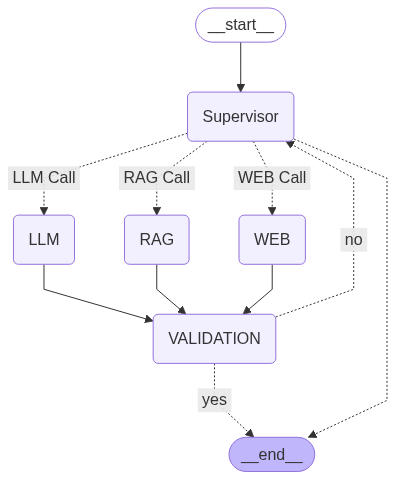

In [83]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
state={"messages":[""]}
app.invoke(state)

Question How to make black tea?, list down in simple steps
Parsed response: Topic='LLM' Reasoning='The query is a generic question about making tea, not related to the Indian Constitution or recent events.'
-> ROUTER ->
last_message: LLM
-> LLM Call ->
answer How to Make Black Tea (Simple Steps):

1. **Boil Water:** Heat fresh water to a rolling boil.  The temperature is crucial for optimal flavor extraction;  around 200-212°F (93-100°C) is ideal.

2. **Warm the Teapot (Optional):**  Pour a small amount of boiling water into your teapot and swirl it around to preheat it. This helps maintain the water temperature and prevents the tea from cooling down too quickly.  Empty the water before adding tea.

3. **Add Tea Leaves:** Place 1-2 teaspoons of loose leaf black tea, or one tea bag, per cup of water into the teapot.  Adjust to your taste preference; more tea makes a stronger brew.

4. **Pour Water Over Tea:** Slowly pour the boiling water over the tea leaves or tea bag.  Make sure all t

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 16
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 14
}
]

In [120]:
state={"messages":["List all the fundamental duties?"]}
app.invoke(state)

Question List all the fundamental duties?
Parsed response: Topic='Constitution' Reasoning='The query asks about fundamental duties, a key component of the Indian Constitution.'
-> ROUTER ->
last_message: Constitution
-> RAG Call ->
answer The fundamental duties of Indian citizens include abiding by the Constitution and respecting its ideals, cherishing the ideals of the freedom struggle, and upholding India's sovereignty.  Additional duties involve defending the country, protecting the environment, and safeguarding national monuments.
Parsed response: Topic='yes' Reasoning="The response lists several fundamental duties, directly answering the user's question."
-> ROUTER_1 ->
last_message: yes


{'messages': ['List all the fundamental duties?',
  'Constitution',
  "The fundamental duties of Indian citizens include abiding by the Constitution and respecting its ideals, cherishing the ideals of the freedom struggle, and upholding India's sovereignty.  Additional duties involve defending the country, protecting the environment, and safeguarding national monuments.",
  'yes']}

In [ ]:
state={"messages":["List all the fundamental duties?"]}
app.invoke(state)

In [129]:
state={"messages":["what is the net worth of Elon Musk"]}
app.invoke(state)

Question what is the net worth of Elon Musk
Parsed response: Topic='Latest' Reasoning="The query asks about Elon Musk's net worth, which is a current event and not related to the Indian Constitution or LLMs."
-> ROUTER ->
last_message: Latest
answer View net worth over: Max 1 year 1 quarter 1 month 1 week. Net Worth Summary. Cash. Private asset. ... 1971 Elon Musk is born in Pretoria, South Africa. 1981 Buys first computer at age 10. Elon Musk's net worth peaked at $486 billion in December 2024, but by March 2025, his fortune had decreased to approximately $330 billion. The market capitalization of Tesla's stock fell from ... Elon Musk on the 2025 The Richest Person In Every State. ... Elon Musk's net worth fell by the equivalent of almost five times Trump's $5.5 billion net worth Thursday. Elon Musk is a South African-born Canadian-American businessman, inventor, and investor who has a net worth of $368 billion. Elon Musk is currently the richest person in the world. In November ... T

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 19
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 16
}
]

## Langgraph Agent Tutorial

In [85]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [86]:
state={"messages":["hi"]}

In [87]:
state="hi"

In [88]:
def function_1(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [USA,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}

In [89]:
state={"messages":["what is a today weather?"]}

In [90]:
state={"messages":["what is a GDP of usa??"]}

In [91]:
function_1(state)

Question what is a GDP of usa??
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'


{'messages': ['USA']}

In [92]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [93]:
def router(state:AgentState):
    print("-> ROUTER ->")
    
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    
    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG"(function_2),
        "LLM Call": "LLM"(function_3),
    }
)

In [94]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [95]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [96]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [97]:
from langgraph.graph import StateGraph,END

In [98]:
workflow=StateGraph(AgentState)

In [99]:
workflow.add_node("Supervisor",function_1)

In [100]:
workflow.add_node("RAG",function_2)

In [101]:
workflow.add_node("LLM",function_3)

In [102]:
workflow.set_entry_point("Supervisor")

In [103]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [104]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

In [105]:
app=workflow.compile()

In [106]:
state={"messages":["hi"]}

In [107]:
app.invoke(state)

Question hi
Parsed response: Topic='Not Related' Reasoning="The query 'hi' is a greeting and does not relate to the USA."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


{'messages': ['hi', 'Not Related', 'Hi there!']}

In [108]:
state={"messages":["what is a gdp of usa?"]}

In [110]:
app.invoke(state)

Question what is a gdp of usa?
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'
-> ROUTER ->
last_message: USA
-> RAG Call ->


{'messages': ['what is a gdp of usa?',
  'USA',
  'The nominal GDP of the USA is approximately $28 trillion USD as of 2024.  This represents about 25% of the global economy.  It holds the #1 ranking worldwide by nominal GDP.']}

In [111]:
state={"messages":["can you tell me the industrial growth of world's most powerful economy?"]}

In [112]:
state={"messages":["can you tell me the industrial growth of world's poor economy?"]}

In [113]:
result=app.invoke(state)

Question can you tell me the industrial growth of world's poor economy?
Parsed response: Topic='Not Related' Reasoning="The query asks about the industrial growth of the world's poor economies, which is a global issue not specific to the USA."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


In [114]:
result["messages"][-1]

'There\'s no single, easily quantifiable answer to "the industrial growth of the world\'s poor economies."  The term "poor economies" itself is broad and encompasses a vast range of nations with vastly different levels of development, industrial bases, and growth trajectories.  Furthermore, data collection in many of these regions is unreliable or incomplete.\n\nHowever, we can make some general observations:\n\n* **Uneven Growth:** Industrial growth in poorer economies is highly uneven. Some countries have experienced significant industrialization, often driven by specific sectors like textiles, garments, or resource extraction.  Others remain largely agrarian, with minimal industrial development.  Success stories often involve strategic government policies, foreign investment, and access to global markets.\n\n* **Challenges to Industrialization:** Many poor economies face significant hurdles to industrial growth, including:\n    * **Lack of Infrastructure:** Inadequate transportation

## ReAct Agent using Langgraph with Multiple tools

In [115]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [116]:
model="deepseek-r1-distill-llama-70b"

> Advanced reasoning model with Chain of thought

### Load the model

In [117]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name=model)

In [118]:
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.086264148, 'prompt_time': 5.7009e-05, 'queue_time': 0.056542881, 'total_time': 0.086321157}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--e31b652a-0743-41ee-8951-fd72c22767dd-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [119]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [120]:
# import operator
# from typing import List
# from langgraph.graph.message import add_messages
# from pydantic import BaseModel , Field
# from typing import TypedDict, Annotated, Sequence
# from langchain_core.messages import BaseMessage
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [121]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [122]:
state={"messages":["hi hello how are you?"]}
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.211081382, 'prompt_time': 0.000201307, 'queue_time': 0.057544522, 'total_time': 0.211282689}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--09f4317a-1a80-4bd6-9c90-0837a5914057-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [ ]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

### Design a simple workflow without tool calling/

In [123]:
workflow=StateGraph(MessagesState)

In [124]:
workflow.add_node("mybot",call_model)

In [125]:
workflow.add_edge(START,"mybot")

In [126]:
workflow.add_edge("mybot",END)

In [127]:
app=workflow.compile()

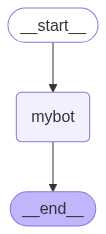

In [128]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [129]:
input={"messages":["hi hello how are you?"]}

In [130]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='dea5852d-13de-43e7-8b3c-076c9f081757'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.224766455, 'prompt_time': 0.000198757, 'queue_time': 0.057345373, 'total_time': 0.224965212}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--135d36e9-297d-423f-b82d-c72c518941e6-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [131]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.203039575, 'prompt_time': 0.000454873, 'queue_time': 0.057552045999999996, 'total_time': 0.203494448}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--b471116e-c875-4848-9893-733c01c10fd5-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




### this is a workflow with tool calling

In [166]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

### testing a tool

In [167]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [168]:
"delhi" in "What is a temperature in Kashmir?"

False

In [169]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000028B8958AFC0>)

In [170]:
llm.invoke("what is a weather in delhi?")

AIMessage(content="<think>\nOkay, so I need to figure out what the weather in Delhi is like. I'm not exactly sure where to start, but I'll try to break it down step by step. First, I know Delhi is a city in India, so maybe the climate there is similar to other parts of India, but I'm not certain. I think India has a monsoon season, so maybe Delhi experiences that too.\n\nI remember hearing that Delhi has really hot summers. I think the summer months might be from April to June, but I'm not sure about the exact temperatures. It must get pretty hot, maybe even over 40 degrees Celsius sometimes. Then, I think there's a monsoon season, which brings a lot of rain. That probably happens around July to September. I wonder how much rainfall they get during that time.\n\nAfter the monsoon, the weather might cool down a bit. So, maybe October to November is autumn or fall, where it's more pleasant, not too hot and not too cold. Then comes winter, from December to February. I've heard that Delhi 

### Binding a tool to the LLM

### Special Note: use some good for agentic workflow since opensource model might not give you the correct output

In [171]:
tools=[search]

In [172]:
llm_with_tool=llm.bind_tools(tools)

### testig my llm_with_tool

In [173]:
response=llm_with_tool.invoke("what is a weather is delhi?")

In [174]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8hhhffgyt', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 133, 'total_tokens': 224, 'completion_time': 0.429744112, 'prompt_time': 0.008945821, 'queue_time': 0.052231799, 'total_time': 0.438689933}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bdf2d013-75b2-47a5-937b-37040fa2fb98-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': '8hhhffgyt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 91, 'total_tokens': 224})

In [175]:
response.content

''

In [176]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': '8hhhffgyt',
  'type': 'tool_call'}]

In [177]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

### Testing code

In [178]:
input={"messages":["what is a weather in delhi?"]}

In [179]:
response=call_model(input)

In [180]:
response["messages"][-1].content

''

In [181]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'r1g8s26bk',
  'type': 'tool_call'}]

### here my router function

#### now whatever will come from call_model router funtion will redirect this to the appropriate tool

In [182]:
# def router_function(state:MessagesState):
#     message=state["messages"]
#     last_message=message[-1]
#     if last_message.tool_calls:
#         return "tools"
#     return END

def router_function(state: MessagesState):
    last_message = state["messages"][-1]
    
    # If the message contains a tool call → go to tools
    if last_message.tool_calls:
        return "tools"
    
    # If it has final content → end
    if last_message.content and not last_message.tool_calls:
        return END

    # Fallback
    return END


In [183]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000028B8958AFC0>)]

In [184]:

tool_node=ToolNode(tools)

In [185]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000028B8958AFC0>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [186]:
workflow2=StateGraph(MessagesState)

In [187]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [188]:
app2=workflow2.compile()

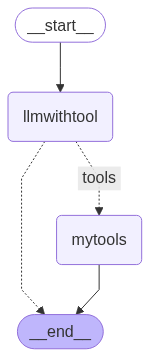

In [189]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [190]:
response=app2.invoke({"messages":["what is a weather in bengraluru?"]})

In [191]:
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [192]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='2b016b2b-db4d-4c04-aace-905141f254b8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xzvsaxm1c', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 162, 'prompt_tokens': 133, 'total_tokens': 295, 'completion_time': 0.707019253, 'prompt_time': 0.014652949, 'queue_time': 0.054244861000000005, 'total_time': 0.721672202}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d865ff2b-7bb1-4830-a829-22cbdc5a9299-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'xzvsaxm1c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 162, 'total_tokens': 295}),
  ToolMessage(content='the temp is 45 degree and sunny', nam

### use good resoning based model

In [193]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='c783bbf9-1564-4b8e-aed0-5094d79728fd'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2epgj3mpt', 'function': {'arguments': '{"query":"weather in Tokyo"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 218, 'prompt_tokens': 130, 'total_tokens': 348, 'completion_time': 0.999828091, 'prompt_time': 0.014856975, 'queue_time': 0.05226332499999999, 'total_time': 1.014685066}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a68e28dd-278c-4c70-9d46-89844e2e7f2f-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Tokyo'}, 'id': '2epgj3mpt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 130, 'output_tokens': 218, 'total_tokens': 348}),
  ToolMessage(content='the temp is 25 degree and cloudy', name='search', 

In [194]:
workflow2.add_edge("mytools","llmwithtool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [195]:
app3=workflow2.compile()

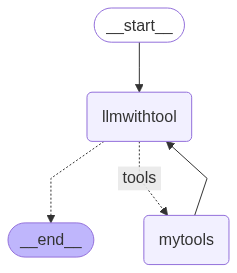

In [196]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))

In [197]:
for output in app3.stream({"messages":["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yj1by5z3n', 'function': {'arguments': '{"query":"weather in New Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 173, 'prompt_tokens': 134, 'total_tokens': 307, 'completion_time': 0.785341994, 'prompt_time': 0.015464317, 'queue_time': 0.057919593, 'total_time': 0.800806311}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0d2d071a-213f-48a8-bae3-145aaefa01cd-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in New Delhi'}, 'id': 'yj1by5z3n', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 173, 'total_tokens': 307})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='bc46c4d3-8a0e-4323-b88e-cfb1222c1286

# Last